In [1]:
import numpy as np
import numpy.matlib

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

import scipy.integrate
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix, triu, spdiags
from scipy.sparse.linalg import spsolve, splu
import scipy.sparse

# import sys
# np.set_printoptions(threshold=sys.maxsize)

import time
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib notebook
# %matplotlib widget

# import pdb

### Problem 1

### A1

In [2]:
# L = 10 
# x_change = np.linspace(-L, L, 200)
# deltax = x_change[-1] - x_change[-2]

In [3]:
L = 10
x = np.arange(-L, L, 0.1)
deltax = x[-1] - x[-2]

In [4]:
m = 200
zero = np.zeros((m))
one = np.ones((m))
Bin = np.array([-one, zero, one])
d = np.array([-1,0,1])
A = spdiags(Bin, d, m, m, format = 'csc')

In [5]:
A[0,-1] = -1
A[-1,0] = 1

/Users/annahuang/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [6]:
A = A/(2*deltax)

In [7]:
A1 = A.todense().copy()

In [8]:
# plt.spy(A)

### A2

In [9]:
f = lambda x: np.exp(-(x-5)**2)
xp = [-L, L]

dt = 0.5
term = 10 # t = 10 
x = np.arange(-L,L,0.1)
N = len(x)

x_evals = np.arange(0,term+dt, dt)

y0 = f(x)

In [10]:
x_evals

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [11]:
# U = 0.5 * A * U
A_2 = (0.5*A)

In [12]:
def PDE(t,x,A):
    u_t = A@x
    return u_t 

In [13]:
sol = solve_ivp(lambda t,x: PDE(t,x,A_2), [0,10], y0, t_eval = x_evals)

In [14]:
A2 = sol.y

In [15]:
# A2.shape

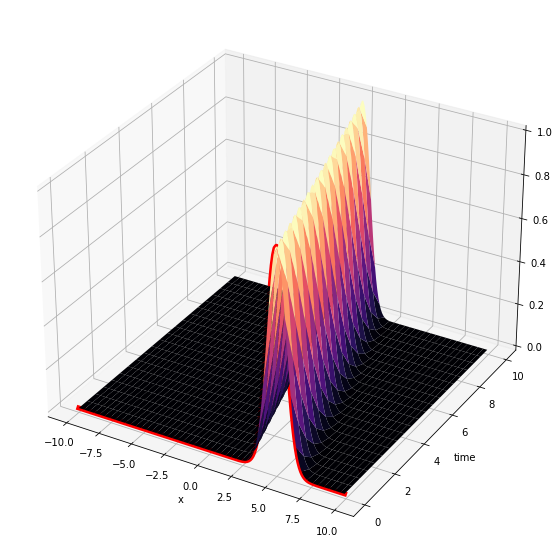

In [16]:
# Create surface plot
X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(25, 10))
surf = ax.plot_surface(X, T, sol.y.T,cmap='magma')
ax.plot3D(x, 0*x, f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

### A3

In [17]:
f = lambda x: np.exp(-(x-5)**2)
L = 10 
xp = [-L, L]

dt = 0.5
term = 10 # t = 10 

x_evals = np.arange(0,term+dt, dt)

y0 = f(x)

x_range = np.arange(-L,L,0.1)

In [18]:
# Rewrite ux as A*u (do this calculation) find the vector that is equal to number of spacial points 
# c is a vector equal to number of spaital points 
# element wise multiplcation between c and Au 

def funcPDE(t,u,A):
        
    c = (1+2*np.sin(5*t)- np.heaviside((x_range),0))
    # c = c.T
    # print(c.shape)
        
    u_t = np.multiply(c ,A@u) # element wise multipication 
    return u_t

In [19]:
tic = time.time()
sol1 = solve_ivp(lambda t,u: funcPDE(t,u,A),[0,10], y0, t_eval = x_evals)
toc = time.time()
# print(toc-tic)

In [20]:
A3 = sol1.y

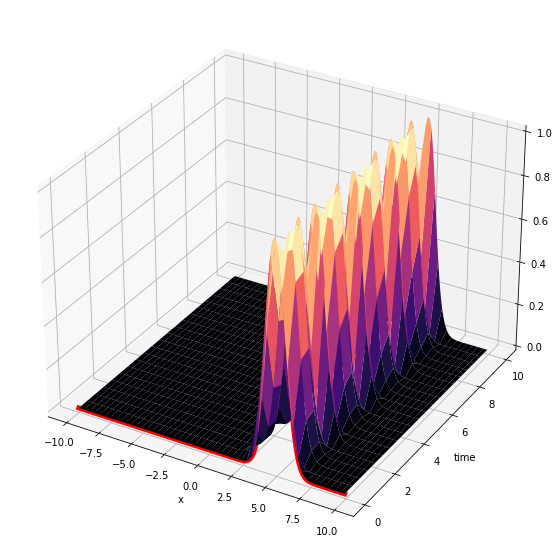

In [21]:
# Create surface plot
X, T = np.meshgrid(x_range,sol1.t)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(25, 10))
surf = ax.plot_surface(X, T, sol1.y.T,cmap='magma')
ax.plot3D(x_range, 0*x_range, f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

### Problem 2

### A4

In [22]:
# delta x or delta y 
n = 64
L = 10
l = np.linspace(-L, L, n+1)
dl = l[1]-l[0]

In [23]:
def A(m):

    # m = 64 # N value in x and y directions
    n = m*m # total size of matrix

    e1 = np.ones(n) # vector of ones
    Low1 = np.tile(np.concatenate((np.ones(m-1), [0])), (m,)) # Lower diagonal 1
    Low2 = np.tile(np.concatenate(([1], np.zeros(m-1))), (m,)) #Lower diagonal 2
                                        # Low2 is NOT on the second lower diagonal,
                                        # it is just the next lower diagonal we see
                                        # in the matrix.

    Up1 = np.roll(Low1, 1) # Shift the array for spdiags
    Up2 = np.roll(Low2, m-1) # Shift the other array

    A = scipy.sparse.spdiags([e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1],
                             [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)], n, n,format = 'csr')
    
    return A

In [24]:
# plt.spy(A(4)) # view the matrix structure
# plt.show()

In [25]:
# A(64)[0,0] = 2
A = A(64)
A[0,0] = 2
A = A/(dl**2)

In [26]:
A4 = np.copy(A.toarray())

### A5

In [27]:
def B(m):
    # m = 5
    n = m*m
    e1_B = np.ones((n)).T # vector of ones

    d_B = np.array([-((m**2)-m), - m, m, (m**2)-m])
    Bin_B = np.array([e1_B, -e1_B, e1_B, -e1_B])


    B = spdiags(Bin_B,d_B, n, n, format = 'csc')
    B = B/(2 * dl)
    return B

In [28]:
B = B(64)

In [29]:
A5 = np.copy(B.toarray())

In [30]:
# plt.spy(B(4))
# plt.show()

### A6

In [31]:
def C(m):
    # m = 5 
    n = m*m

    e1_C = np.ones(n) # vector of ones
    Low1_C = np.tile(np.concatenate((np.ones(m-1), [0])), (m,)) # Lower diagonal 1
    Low2_C = np.tile(np.concatenate(([1], np.zeros(m-1))), (m,)) #Lower diagonal 2

    Up1_C = np.roll(Low1_C, 1) 
    Up2_C = np.roll(Low2_C, m-1)

    C = scipy.sparse.spdiags([Low2_C, -Low1_C, Up1_C, -Up2_C],
                            [-m+1, -1, 1, m-1], n, n,format = 'csc')
    C = C/(2 * dl)
    return C
# plt.spy(C(5))
# plt.show()

In [32]:
C = C(64)

In [33]:
A6 = np.copy(C.toarray())

### A7

In [34]:
L = 10
xp = [0, 4]

# time
t_evals = np.linspace(0,4,9)
dt = 0.5

In [35]:
x = np.linspace(-10, 10, 64, endpoint=False)
y = np.linspace(-10, 10, 64, endpoint=False)
# k = np.exp(-2*(x**2) - ((y**2)/20))

In [39]:
# # initial conditions 
# for x and y (1 - 64)

w0 = np.array([])

for i in range(64):
    k = np.exp(-2*(x**2) - ((y**2)/20))
    w0 = np.append(w0,k)

In [40]:
w0.shape

(4096,)

In [65]:
xx, yy = np.meshgrid(x, y)
np.exp(-2*(xx**2) - ((yy**2)/20)).reshape(4096)

array([9.32462145e-90, 2.05820720e-84, 3.07397756e-79, ...,
       4.22534777e-74, 4.18116340e-79, 2.79953267e-84])

In [66]:
xx

array([[-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       ...,
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875]])

In [67]:
x

array([-10.    ,  -9.6875,  -9.375 ,  -9.0625,  -8.75  ,  -8.4375,
        -8.125 ,  -7.8125,  -7.5   ,  -7.1875,  -6.875 ,  -6.5625,
        -6.25  ,  -5.9375,  -5.625 ,  -5.3125,  -5.    ,  -4.6875,
        -4.375 ,  -4.0625,  -3.75  ,  -3.4375,  -3.125 ,  -2.8125,
        -2.5   ,  -2.1875,  -1.875 ,  -1.5625,  -1.25  ,  -0.9375,
        -0.625 ,  -0.3125,   0.    ,   0.3125,   0.625 ,   0.9375,
         1.25  ,   1.5625,   1.875 ,   2.1875,   2.5   ,   2.8125,
         3.125 ,   3.4375,   3.75  ,   4.0625,   4.375 ,   4.6875,
         5.    ,   5.3125,   5.625 ,   5.9375,   6.25  ,   6.5625,
         6.875 ,   7.1875,   7.5   ,   7.8125,   8.125 ,   8.4375,
         8.75  ,   9.0625,   9.375 ,   9.6875])

In [68]:
y

array([-10.    ,  -9.6875,  -9.375 ,  -9.0625,  -8.75  ,  -8.4375,
        -8.125 ,  -7.8125,  -7.5   ,  -7.1875,  -6.875 ,  -6.5625,
        -6.25  ,  -5.9375,  -5.625 ,  -5.3125,  -5.    ,  -4.6875,
        -4.375 ,  -4.0625,  -3.75  ,  -3.4375,  -3.125 ,  -2.8125,
        -2.5   ,  -2.1875,  -1.875 ,  -1.5625,  -1.25  ,  -0.9375,
        -0.625 ,  -0.3125,   0.    ,   0.3125,   0.625 ,   0.9375,
         1.25  ,   1.5625,   1.875 ,   2.1875,   2.5   ,   2.8125,
         3.125 ,   3.4375,   3.75  ,   4.0625,   4.375 ,   4.6875,
         5.    ,   5.3125,   5.625 ,   5.9375,   6.25  ,   6.5625,
         6.875 ,   7.1875,   7.5   ,   7.8125,   8.125 ,   8.4375,
         8.75  ,   9.0625,   9.375 ,   9.6875])

In [42]:
def func_ivp(t, w):
    
    v = 0.001
    
    # update psi 
    psi = scipy.sparse.linalg.spsolve(A, w)
    
    dw = (v*A@w) - ((B@psi)*(C@w)) + ((C@psi)*(B@w))
    
    return dw 

In [43]:
tic_gaus = time.time()
sol = scipy.integrate.solve_ivp(lambda t, w: func_ivp(t, w), xp, w0, t_eval = t_evals)
toc_gaus = time.time()
# print(toc_gaus-tic_gaus)

In [44]:
A7 = sol.y.T

### A8

In [45]:
L = 10
xp = [0, 4]

# time
t_evals = np.linspace(0,4,9)
dt = 0.5

In [46]:
# # initial conditions 
w0 = np.array([])

for x in range(1, 65):
    for y in range(1, 65):
        k = np.exp(-2*(x**2) - ((y**2)/20))
        w0 = np.append(w0,k)

In [47]:
PLU = scipy.sparse.linalg.splu(A)

def func_ivp_plu(t, w):
    
    v = 0.001
    
    # update psi 
    psi = PLU.solve(w)
    
    dw = (v*A@w) - ((B@psi)*(C@w)) + ((C@psi)*(B@w))
    
    return dw 

/Users/annahuang/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [48]:
tic_plu = time.time()
sol2 = scipy.integrate.solve_ivp(lambda t, w: func_ivp_plu(t, w), xp, w0, t_eval = t_evals)
toc_plu = time.time()
print(toc_plu-tic_plu)

0.03428483009338379


In [49]:
A8 = sol2.y.T

### A9

In [50]:
q = sol2.y[:,0].reshape(64,64)

In [51]:
w = sol2.y[:,1].reshape(64, 64)

In [52]:
e = sol2.y[:,2].reshape(64, 64)

In [53]:
r = sol2.y[:,3].reshape(64, 64)

In [54]:
t = sol2.y[:,4].reshape(64, 64)

In [55]:
y = sol2.y[:,5].reshape(64, 64)

In [56]:
u = sol2.y[:,6].reshape(64, 64)

In [57]:
i = sol2.y[:,7].reshape(64, 64)

In [58]:
o = sol2.y[:,8].reshape(64, 64)

In [59]:
A9 = np.stack([q,w,e,r,t,y,u,i,o])

In [62]:
# L = 10
# term = 4
# x = np.arange(-L, L, 0.3125)
# y = np.arange(-L, L, 0.3125)
# N = len(x)

In [63]:
# fig5, ax5 = plt.subplots()

# X, Y = np.meshgrid(x, y)
# surf = ax5.contourf(X, Y, w)
# fig5.colorbar(surf)

# # ax5.set_title('Contour plot of the time evolution of the second mode', fontsize = 16)
# ax5.set_xlabel(r'$x-value$', fontsize=14)
# ax5.set_ylabel(r'$y-value$', fontsize=14)